In [8]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt

In [2]:
df=pd.DataFrame(np.random.randn(5,3),
               columns=['c1','c2','c3'])

In [3]:
df

,c1,c2,c3
0,-0.135866,0.163585,-1.571617
1,0.288336,-0.264973,-3.143145
2,-0.977667,0.430021,-1.099059
3,1.018299,0.727402,0.216412
4,0.191871,-0.350573,0.198597


In [16]:
dfdate=['07/3/2019','07/4/2019','07/5/2019','07/10/2019']
dfdate
myDate=pd.to_datetime(dfdate)
myDate

DatetimeIndex(['2019-07-03', '2019-07-04', '2019-07-05', '2019-07-10'], dtype='datetime64[ns]', freq=None)

In [17]:
times=Series([1,np.nan, np.nan ,20], index=myDate)
times

2019-07-03     1.0
2019-07-04     NaN
2019-07-05     NaN
2019-07-10    20.0
dtype: float64

In [18]:
#보간법(interpolate)
ti=times.interpolate()
ti

2019-07-03     1.000000
2019-07-04     7.333333
2019-07-05    13.666667
2019-07-10    20.000000
dtype: float64

In [19]:
times.interpolate(method="time")

2019-07-03     1.000000
2019-07-04     3.714286
2019-07-05     6.428571
2019-07-10    20.000000
dtype: float64

In [23]:
df=DataFrame({'c1':[1,2,np.nan,np.nan,5],
           'c2':[6,8,10,np.nan,20]})
df

,c1,c2
0,1.0,6.0
1,2.0,8.0
2,NaN,10.0
3,NaN,NaN
4,5.0,20.0


In [24]:
df.interpolate(method='values')

,c1,c2
0,1.0,6.0
1,2.0,8.0
2,3.0,10.0
3,4.0,15.0
4,5.0,20.0


In [25]:
df.interpolate(method='values', limit=1)

,c1,c2
0,1.0,6.0
1,2.0,8.0
2,3.0,10.0
3,NaN,15.0
4,5.0,20.0


In [26]:
df.interpolate(method='values', limit=1, limit_direction='backward')

,c1,c2
0,1.0,6.0
1,2.0,8.0
2,NaN,10.0
3,4.0,15.0
4,5.0,20.0


In [27]:
s=Series([1,2,3,4,np.nan])
s

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
dtype: float64

In [29]:
s.replace(np.nan, 10)
s.replace(3,100)

0      1.0
1      2.0
2    100.0
3      4.0
4      NaN
dtype: float64

In [32]:
s.replace([1,2,3], [5,6,7])
s.replace({1:10, np.nan:999})

0     10.0
1      2.0
2      3.0
3      4.0
4    999.0
dtype: float64

In [35]:
df=pd.DataFrame({'k1':['a','b','b','c','c'],
             'k2':['v','w','w','x','y'],
             'c':[1,2,3,4,5]})
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
k1    5 non-null object
k2    5 non-null object
c     5 non-null int64
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


In [37]:
df.duplicated(['k1'])
df.duplicated(['k1','k2'])

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [41]:
df.duplicated(['k1'])
df.duplicated(['k1'], keep='first') #default
df.duplicated(['k1'], keep='last')
df.duplicated(['k1'], keep=False)

0    False
1     True
2     True
3     True
4     True
dtype: bool

In [48]:
df.drop_duplicates(['k1'])
df.drop_duplicates(['k1'],keep='first') #default
df.drop_duplicates(['k1'],keep='last') 
df.drop_duplicates(['k1'],keep=False) 
#df

,k1,k2,c
0,a,v,1


In [54]:
df=pd.DataFrame({
    's':['f','m','m','f','m'],
    'd':['a','a','a','a',np.nan],
    'c':[1,1,3,4,4]})
#df
#df.info()
df['s'].unique()
df['d'].unique()

array(['a', nan], dtype=object)

In [63]:
df['s'].value_counts()
#df:붕어빵, df['s']:자동차, value_counts():달린다
#df.value_counts()는 말이 안됨
#df['s'].value_counts()는 말이 됨

df['d'].value_counts() #Nan은 안나옴

a    4
Name: d, dtype: int64

In [64]:
df['s'].value_counts(normalize=True)

m    0.6
f    0.4
Name: s, dtype: float64

In [65]:
df['c']

0    1
1    1
2    3
3    4
4    4
Name: c, dtype: int64

In [68]:
df['c'].value_counts(sort=True) #default:내림차순 정렬
df['c'].value_counts(sort=True, ascending=False) 
df['c'].value_counts(sort=True, ascending=True) 


3    1
1    2
4    2
Name: c, dtype: int64

In [72]:
df['d'].value_counts(dropna=True) #default
df['d'].value_counts(dropna=False) 

a      4
NaN    1
Name: d, dtype: int64

In [ ]:
#오후 연습 문제
#캐글->타이타닉->호칭->호칭별 건수->소트->상위 10개호칭 조사
#나이(age)->구간화->구간별 건수 ->소트 출력

In [73]:
df

,s,d,c
0,f,a,1
1,m,a,1
2,m,a,3
3,f,a,4
4,m,NaN,4


In [77]:
df['c'].value_counts(sort=False,bins=[0,1,2,3,4])

(-0.001, 1.0]    2
(1.0, 2.0]       0
(2.0, 3.0]       1
(3.0, 4.0]       2
Name: c, dtype: int64

In [79]:
res=pd.cut(df['c'], bins=[0,1,2,3,4])
pd.value_counts(res)

(3, 4]    2
(0, 1]    2
(2, 3]    1
(1, 2]    0
Name: c, dtype: int64

In [82]:
data=np.random.randint(20,size=(6,5))
data

array([[ 4,  4,  6, 19, 12],
       [ 0,  8, 16, 12, 11],
       [14, 11,  1, 19, 17],
       [ 4, 11,  1,  9, 18],
       [14,  5, 19,  1, 19],
       [ 8,  3, 12, 11, 18]])

In [93]:
from numpy import *
#1. numpy 표준화
print(mean(data))#전체 평균
print(data)
#표준화 : (각 열의 데이터 - 각 열의 평균)   / 각 열의 표준편차
#    z = (x - mean() ) / std()
print(mean(data, axis=0))
print("="*50)
std_data = ( data-mean(data, axis=0) ) / std(data, axis=0)

10.233333333333333
[[ 4  4  6 19 12]
 [ 0  8 16 12 11]
 [14 11  1 19 17]
 [ 4 11  1  9 18]
 [14  5 19  1 19]
 [ 8  3 12 11 18]]
[ 7.33333333  7.          9.16666667 11.83333333 15.83333333]


In [94]:
std_data

array([[-0.63500064, -0.93325653, -0.45174118,  1.16046805, -1.22416648],
       [-1.3970014 ,  0.31108551,  0.97480992,  0.02698763, -1.54351426],
       [ 1.27000127,  1.24434203, -1.16501673,  1.16046805,  0.37257241],
       [-0.63500064,  1.24434203, -1.16501673, -0.45878969,  0.69192018],
       [ 1.27000127, -0.62217102,  1.40277525, -1.75419589,  1.01126796],
       [ 0.12700013, -1.24434203,  0.40418948, -0.13493815,  0.69192018]])

In [95]:
mean(std_data, axis=0)

array([ 6.47630098e-17,  3.70074342e-17,  7.40148683e-17, -1.66533454e-16,
       -1.85037171e-16])

In [96]:
std(std_data, axis=0)

array([1., 1., 1., 1., 1.])

In [99]:
import scipy.stats as ss
std_data=ss.zscore(data)
std_data

array([[-0.63500064, -0.93325653, -0.45174118,  1.16046805, -1.22416648],
       [-1.3970014 ,  0.31108551,  0.97480992,  0.02698763, -1.54351426],
       [ 1.27000127,  1.24434203, -1.16501673,  1.16046805,  0.37257241],
       [-0.63500064,  1.24434203, -1.16501673, -0.45878969,  0.69192018],
       [ 1.27000127, -0.62217102,  1.40277525, -1.75419589,  1.01126796],
       [ 0.12700013, -1.24434203,  0.40418948, -0.13493815,  0.69192018]])

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
std_data=StandardScaler().fit_transform(data)
std_data

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.63500064, -0.93325653, -0.45174118,  1.16046805, -1.22416648],
       [-1.3970014 ,  0.31108551,  0.97480992,  0.02698763, -1.54351426],
       [ 1.27000127,  1.24434203, -1.16501673,  1.16046805,  0.37257241],
       [-0.63500064,  1.24434203, -1.16501673, -0.45878969,  0.69192018],
       [ 1.27000127, -0.62217102,  1.40277525, -1.75419589,  1.01126796],
       [ 0.12700013, -1.24434203,  0.40418948, -0.13493815,  0.69192018]])

In [102]:
#이상치, 특이값이 포함되어있는 데이터의 표준화
#평균, 표준편차는 이상치의 영향을 크게 받음(민감함)

#중앙값(Q2), IQR(Q3-Q1)
#robustscaler = x-median() / IQR



10.147389546015

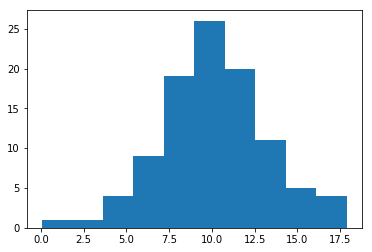

In [115]:
np.random.seed(73)
mu, sigma = 10, 3
x=mu+sigma*np.random.randn(100)
x
import matplotlib.pyplot as plt

plt.hist(x)
mean(x)

In [116]:
x

array([11.73043915, 16.39332639, 17.320659  , 10.78998062,  5.51163806,
        9.88979408, 11.29208736,  5.41157701,  7.80922097, 13.15394571,
       14.85937801,  5.18495989, 10.9930286 ,  9.36714293, 10.8945301 ,
        6.56177945, 11.72608607,  8.9082801 , 10.10919758,  8.43830804,
        9.952707  ,  9.86247581,  8.14476643,  7.54049167, 11.52942571,
       13.15181833, 10.43509572,  8.97743181, 13.73237532, 14.96745496,
        9.18100947,  8.92022193,  0.07338429, 13.15509679,  9.32104691,
        8.01247213, 12.73917563, 12.76350652, 12.71635723,  8.54749669,
        7.85535142, 10.54716188, 11.73015021,  5.30930238, 15.6590461 ,
        6.80288206, 10.33849318,  8.23193967, 11.93280031, 10.91541905,
       11.85215573, 13.29726519,  8.69230361, 11.19550648, 10.01848898,
        4.93669823, 10.0159642 , 12.36761596, 11.77181612,  6.89236123,
       13.12230939,  8.03537406,  8.08006912, 11.32291988,  9.03981268,
       14.20361445, 10.5615933 , 12.96978103,  9.91591744, 10.50

In [117]:
mean(x)

10.147389546015

In [118]:
std(x)

3.014695610662603

In [121]:
x[95:100]=100
x
mean(x)
std(x)

19.790826557586872

(array([ 1.,  1.,  7.,  8., 29., 25., 14.,  6.,  4.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
         26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
         52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
         78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100]),
 <a list of 50 Patch objects>)

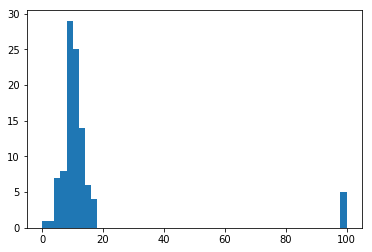

In [126]:
#plt.hist(x)
plt.hist(x,bins=np.arange(0,101,2))

In [137]:
print(np.shape(x))
x=x.reshape(-1,1) #-1:니가 알아서 계산해(난 하기 싫어)
#dl: -1 => None
print(np.shape(x))
std_x=StandardScaler().fit_transform(x)
std_x

(100, 1)
(100, 1)


array([[-0.15094936],
       [ 0.08465915],
       [ 0.13151584],
       [-0.19846928],
       [-0.46517581],
       [-0.24395432],
       [-0.1730986 ],
       [-0.47023174],
       [-0.34908248],
       [-0.07902176],
       [ 0.0071511 ],
       [-0.48168235],
       [-0.18820958],
       [-0.27036308],
       [-0.19318656],
       [-0.41211378],
       [-0.15116931],
       [-0.29354871],
       [-0.2328682 ],
       [-0.31729568],
       [-0.24077543],
       [-0.24533467],
       [-0.33212788],
       [-0.36266096],
       [-0.16110626],
       [-0.07912926],
       [-0.21640107],
       [-0.29005458],
       [-0.04979461],
       [ 0.01261207],
       [-0.27976812],
       [-0.29294531],
       [-0.7399624 ],
       [-0.0789636 ],
       [-0.27269224],
       [-0.33881251],
       [-0.09997946],
       [-0.09875006],
       [-0.10113244],
       [-0.31177854],
       [-0.34675158],
       [-0.21073854],
       [-0.15096396],
       [-0.47539952],
       [ 0.0475571 ],
       [-0

In [138]:
mean(std_x)

5.329070518200751e-17

In [139]:
std(std_x)

1.0

(array([48., 47.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([-0.7399624 , -0.23504859,  0.26986522,  0.77477902,  1.27969283,
         1.78460664,  2.28952044,  2.79443425,  3.29934806,  3.80426186,
         4.30917567]),
 <a list of 10 Patch objects>)

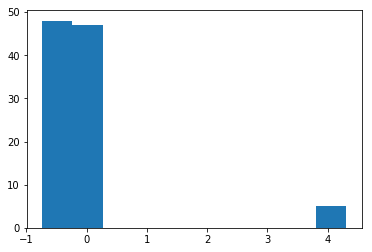

In [140]:
plt.hist(std_x)

(array([ 0.,  1.,  9., 45., 32.,  8.,  0.,  0.,  0.]),
 array([-1.00000000e+00, -8.00000000e-01, -6.00000000e-01, -4.00000000e-01,
        -2.00000000e-01, -2.22044605e-16,  2.00000000e-01,  4.00000000e-01,
         6.00000000e-01,  8.00000000e-01]),
 <a list of 9 Patch objects>)

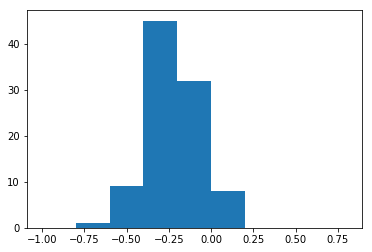

In [147]:
std_o=std_x[std_x<4]
plt.hist(std_o, bins=np.arange(-1, 1, 0.2))

In [154]:
#import numpy as np
#np.mean(x)
mean(x)#14.7
median(x)#10.3
Q1=percentile(x, 25) #q1:8.43
Q3=percentile(x, 75) #q3:12.53
IQR=Q3-Q1

In [157]:
rbs_x=RobustScaler().fit_transform(x) 
#robustscaler = x-median() / IQR
rbs_x
median(rbs_x)

0.0

In [158]:
mean(rbs_x)

1.0568310264435923

In [159]:
std(rbs_x)

4.829204078863935

(array([48., 47.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([-2.5165984 , -0.07826658,  2.36006523,  4.79839704,  7.23672886,
         9.67506067, 12.11339248, 14.5517243 , 16.99005611, 19.42838793,
        21.86671974]),
 <a list of 10 Patch objects>)

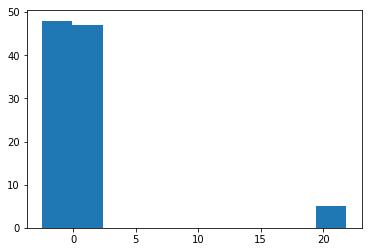

In [160]:
plt.hist(rbs_x)

(array([ 0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  5.,  2.,  4.,  4., 11.,
        12., 10., 11., 10.,  7.,  6.,  2.,  4.,  1.,  2.,  1.,  1.,  0.,
         0.,  0.,  0.]),
 array([-3.00000000e+00, -2.80000000e+00, -2.60000000e+00, -2.40000000e+00,
        -2.20000000e+00, -2.00000000e+00, -1.80000000e+00, -1.60000000e+00,
        -1.40000000e+00, -1.20000000e+00, -1.00000000e+00, -8.00000000e-01,
        -6.00000000e-01, -4.00000000e-01, -2.00000000e-01,  2.66453526e-15,
         2.00000000e-01,  4.00000000e-01,  6.00000000e-01,  8.00000000e-01,
         1.00000000e+00,  1.20000000e+00,  1.40000000e+00,  1.60000000e+00,
         1.80000000e+00,  2.00000000e+00,  2.20000000e+00,  2.40000000e+00,
         2.60000000e+00,  2.80000000e+00]),
 <a list of 29 Patch objects>)

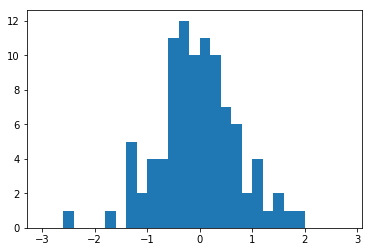

In [163]:
rbs_o=rbs_x[rbs_x<5]
plt.hist(rbs_o, bins=np.arange(-3,3,0.2))

In [164]:
#정규화 :(각 열의 요소값 - 각 열의 최소값) / (각 열의 최대값 - 각 열의 최소값)
#0~1 사이의 범위(딥러닝)
#연습문제 : 관심 회사->주식데이터 다운로드(1개월)->표준화/정규화
from sklearn.preprocessing import MinMaxScaler

In [168]:
x=np.array([
         [9, -9, 2],
         [5, 0, 1],
         [1, 10, 4],
         [4, 7, -2]])

In [173]:
x.min(axis=0) #  [ 1, -9, -2]
x.max(axis=0)

array([ 9, 10,  4])

In [175]:
(x-x.min(axis=0))  / (x.max(axis=0) - x.min(axis=0))

array([[1.        , 0.        , 0.66666667],
       [0.5       , 0.47368421, 0.5       ],
       [0.        , 1.        , 1.        ],
       [0.375     , 0.84210526, 0.        ]])

In [176]:
x_minmax=MinMaxScaler().fit_transform(x)
x_minmax

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[1.        , 0.        , 0.66666667],
       [0.5       , 0.47368421, 0.5       ],
       [0.        , 1.        , 1.        ],
       [0.375     , 0.84210526, 0.        ]])

In [177]:
from sklearn.preprocessing import minmax_scale

In [178]:
minmax_scale(x, axis=0)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


array([[1.        , 0.        , 0.66666667],
       [0.5       , 0.47368421, 0.5       ],
       [0.        , 1.        , 1.        ],
       [0.375     , 0.84210526, 0.        ]])

In [179]:
#연습문제 : 이항변수화 변환(타이타닉)
#연속형 변수 값 -> 0 또는 1(2 가지)
from sklearn.preprocessing import Binarizer

In [180]:
x=np.array([[5, -3, 2],
         [7,-1,0],
         [0,9,5]])

In [181]:
#3을 기준(threshold)
Binarizer().fit(x) #threshold=0.0

Binarizer(copy=True, threshold=0.0)

In [186]:
bnr=Binarizer(2).fit(x) #2이하->0, 2초과->1
bnr.transform(x)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 1]])

In [187]:
x

array([[ 5, -3,  2],
       [ 7, -1,  0],
       [ 0,  9,  5]])